## Data Wrangling

First, we need to import the libraries.

In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json

### Gathering Data

We are having three dataset:
>1- The WeRateDogs Twitter archive only contains very basic tweet information.

>2- The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. We should be downloaded programmatically using the Requests library.
(URL:https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

>3- Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

 #### 1. Twitter csv file

In [2]:
# Read CSV file into DataFrame - WeRateDogs Twitter archive
df1_twitter_arch = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
df1_twitter_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Twitter tsv file - Image Predictions 

In [4]:
# Download file using Requests library and URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

with open('image_prediction.tsv',mode='wb') as file:
    file.write(response.content)
    
# Read Image Predictions 
df2_pred = pd.read_csv('image_prediction.tsv', sep = '\t', encoding = 'utf-8')
df2_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Gather data from twitter API using Python's Tweepy library and store data

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
## use the Auth to get the access token 
auth = OAuthHandler(consumer_key, consumer_secret)
## send the accecc token to the endpoint to access the API
auth.set_access_token(access_token, access_secret)
# Deal with teh rate limit to communicate with the server
api = tweepy.API(auth, wait_on_rate_limit=True)
## Deal with  response as Json Obj based on tweet id
'''
tweet_ids = df1_twitter_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''
# Load Twitter API data using Udacity https://knowledge.udacity.com/questions/42488
tweet_details = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
 
with open('tweet_json.txt') as f:
 
    for line in f:
 
        status  = json.loads(line)
 
        tweet_id = status['id_str']
 
        retweet_count = status['retweet_count']
 
        favorite_count = status['favorite_count']
 
        tweet_details = tweet_details.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],columns=['tweet_id', 'retweet_count', 'favorite_count']))

df3_tweet_api = tweet_details.reset_index(drop=True)
df3_tweet_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Assessing Data

#### 1. Visual assessment
##### 1.1 Twitter Archive csv File

In [6]:
# Display the Twitter Archive Dataset
df1_twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Twitter Archive Dataset includes 2,356 rows and 17 columns 

* tweet_id: The unique identifier for each tweet
* in_reply_to_status_id: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
* in_reply_to_user_id: If the represented Tweet is a reply, Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet
* timestamp: Date & time when the tweet has been created
* source: platform used to post the Tweet
* text: The actual UTF-8 text of the status update
* retweeted_status_id / retweeted_status_user_id /  retweeted_status_timestamp: Tweets authored by other users by retweeting .Users can also unretweet a retweet they created by deleting their retweet.
* expanded_urls: URL where the tweet can be found using the tweet_Id at the end of the url(Not all usrl has twee_id at the end)
* rating_numerator: The top number of a fraction
* rating_denominator: The bottom number of a fraction
* name: The name of the dog

* doggo / floofer / pupper / puppo: Dog ages & stages

#### 1.2- Image Predictions tsv file

In [7]:
# Display the Image Predictions File
df2_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


The file includes 2,075 rows and 12 columns

* tweet_id: The last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
* jpg_URL: Where the image is hosted
* img_num: Image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
* p1: Algorithm's #1 prediction for the image in the tweet → golden retriever
* p1_conf: How confident the algorithm is in its #1 prediction → 95%
* p1_dog: Whether or not the #1 prediction is a breed of dog → TRUE
* p2: Algorithm's second most likely prediction → Labrador retriever
* p2_conf: How confident the algorithm is in its #2 prediction → 1%
* p2_dog: Whether or not the #2 prediction is a breed of dog → TRUE etc.


#### 1.3 API Json file

In [8]:
# Display Twitter Data from the API
df3_tweet_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


This file includes originally 2,342 rows and 3 columns

* favorite_count: count of likes
* retweets_count: Number of times this Tweet has been retweeted
* tweet_id: The unique identifier for each tweet

### 2. Programmatic assessment
#### 2.1 Twitter Archived CSV

In [9]:
df1_twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1216,714982300363173890,NaN,NaN,2016-03-30 01:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Calbert. He forgot to clear his Google...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714982300...,9,10,Calbert,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
1996,672591762242805761,NaN,NaN,2015-12-04 01:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Taz. He boxes leaves. 10/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591762...,10,10,Taz,None,None,None,None
1895,674742531037511680,6.747400e+17,4.196984e+09,2015-12-10 00:08:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Some clarification is required. The dog is sin...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [10]:
df1_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df1_twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# Check if we have duplicatetweet_id
df1_twitter_arch.tweet_id.duplicated().sum()

0

In [13]:
# Look for tweets where the rating numerator is not 10
df1_twitter_arch[df1_twitter_arch['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [14]:
#Check if rating denominator if there's value greater than 10
df1_twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# Check all numerator that are greater than 10
df1_twitter_arch.rating_numerator.value_counts().head()

12    558
11    464
10    461
13    351
9     158
Name: rating_numerator, dtype: int64

In [16]:
# Check the dog's name 
df1_twitter_arch.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
Bailey              7
Daisy               7
an                  7
Buddy               7
Toby                7
Leo                 6
Stanley             6
Oscar               6
Koda                6
Scout               6
Dave                6
Jack                6
Jax                 6
Bella               6
Rusty               6
Milo                6
Chester             5
                 ... 
Michelangelope      1
Shikha              1
Dante               1
JD                  1
Ridley              1
Cuddles             1
Cecil               1
Zeus                1
Cermet              1
Mary                1
Remy                1
Tove                1
Mosby               1
Superpup            1
Bones     

In [17]:
# Check dog's names that are not a real name
df1_twitter_arch.loc[(df1_twitter_arch.name.str.islower())].name

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

In [18]:
# Check for tweets with null image
df1_twitter_arch['expanded_urls'].isnull().sum()

59

In [19]:
# Check how many retweets 
len((df1_twitter_arch[df1_twitter_arch['text'].str.startswith('RT') == True]))


183

In [20]:
# Check how many user mentioned 
len((df1_twitter_arch[df1_twitter_arch['text'].str.contains('@') == True]))

267

#### 2.2 Image Predections 

In [21]:
df2_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
686,684097758874210310,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,1,Labrador_retriever,0.627856,True,German_short-haired_pointer,0.173675,True,Chesapeake_Bay_retriever,0.041342,True
1912,853760880890318849,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,1,miniature_pinscher,0.292519,True,Chihuahua,0.120946,True,Rottweiler,0.119490,True
1227,745314880350101504,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,2,ice_bear,0.807762,False,great_white_shark,0.027040,False,fountain,0.022052,False
942,704113298707505153,https://pbs.twimg.com/media/CcWDTerUAAALORn.jpg,2,otter,0.945537,False,mink,0.018231,False,sea_lion,0.015861,False
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True


In [22]:
df2_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df2_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
#Check tweet_id is duplicate
df2_pred.tweet_id.duplicated().sum()

0

In [25]:
# Counts number of image pred
df2_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [26]:
#Check if there's empty img url
df2_pred.jpg_url.isnull().sum()

0

#### 2.3 Tweeter ApI Json file

In [27]:
df3_tweet_api.sample(5)

,tweet_id,retweet_count,favorite_count
175,857746408056729600,11524,36021
547,805487436403003392,2929,9773
2198,668655139528511488,233,562
670,789960241177853952,4839,0
2255,667728196545200128,162,398


In [28]:
df3_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [29]:
df3_tweet_api.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,726224900189511680,3652,0
freq,1,5,179


In [30]:
#Check if there's duplicated tweet_id
df3_tweet_api.tweet_id.duplicated().sum()

0

##### Issues we noticed 

### quality issues:

* Tweet_id, timestamp,img_num and dog_stages need to be changed into the right datatype.
* Dog name is not always accurate.
* Nulls represented as 'None' in columns 'doggo', 'floofer', 'pupper','puppo'.
* Some errors in rating.
* Deleting numerators and denominator columns and create new rating column
* Some tweets don't include images

* we only want original ratings (no retweets).So the retweets shouldn't be there.
* We only want ratings with images. Not all ratings have images.
* clean source based on platform


### Tidiness Issues:

* Merging  dataframes into one using tweet_id for joining .
* the columns 'doggo', 'floofer', 'pupper','puppo' show one variable.
* unusefl columns should be deleted.

## Cleaning Data

In [31]:
# Copies of the original pieces of data
df1_clean = df1_twitter_arch.copy()
df2_clean = df2_pred.copy()
df3_clean = df3_tweet_api.copy()


### 1. Tidiness Issues:
 Untidy data has structural issues
 ### 1.1 Issues : Merging Datasets
 #### Define
Merging the three datasets in one set.

#### Code

In [32]:
#Combine df1_clean,df2_clean and df3_clean on tweet_id
df3_clean['tweet_id'] = df3_clean['tweet_id'].astype(str)
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)

df_all_clean = pd.merge(df1_clean, df3_clean, on = 'tweet_id')

# Join df_all_clean with df2_clean (Image Predictions)
#convdrt df3_clean tweet_id to int

df4_clean = pd.merge(df_all_clean, df2_clean,on = 'tweet_id')

#### Test

In [33]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073

In [34]:
df4_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1198,698178924120031232,NaN,NaN,2016-02-12 16:16:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lily. She accidentally dropped all her...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698178924...,...,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
1776,671362598324076544,NaN,NaN,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671362598...,...,1,tub,0.393616,False,bathtub,0.383522,False,swimming_trunks,0.077301,False
1087,707610948723478529,NaN,NaN,2016-03-09 16:56:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harper. She scraped her elbow attempti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707610948...,...,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True
1433,681297372102656000,NaN,NaN,2015-12-28 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a lion. We only rate dogs. Fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681297372...,...,1,Lhasa,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True
104,868622495443632128,NaN,NaN,2017-05-28 00:18:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a h*ckin peaceful boy. Unbothered by th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868622495...,...,1,Labrador_retriever,0.868107,True,Great_Pyrenees,0.060973,True,Saint_Bernard,0.033489,True


### Issue 2 : The columns 'doggo', 'floofer', 'pupper','puppo' merge in one column 
#### Define
Merge dogs stage into one column

#### Code

In [35]:
df4_clean['dog_stages'] = df4_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Drop the unnecessary columns
df4_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)


# use cat to combine 
#df4_clean['dog_stages']  = df4_clean['doggo','pupper', 'floofer', 'puppo']
# drop the four old colomns
#df4_clean = df4_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)
df4_clean['dog_stages'].value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_stages, dtype: int64

#### Test

In [36]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
retweet_count                 2073 non-null object
favorite_count                2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 

In [37]:
df4_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
1141,703079050210877440,NaN,NaN,2016-02-26 04:48:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Butternut Cumberfloof. It's not wind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703079050...,...,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,0.060296,True,NaN
1349,686007916130873345,NaN,NaN,2016-01-10 02:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper has a magical eye. 11/10 I can't s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686007916...,...,Rhodesian_ridgeback,0.885301,True,redbone,0.042335,True,seat_belt,0.010493,False,pupper
301,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,...,German_shepherd,0.806115,True,Tibetan_mastiff,0.104831,True,kelpie,0.038148,True,pupper
90,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871879754...,...,Shetland_sheepdog,0.969171,True,collie,0.018261,True,Pomeranian,0.008515,True,puppo
825,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,...,Chesapeake_Bay_retriever,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,NaN


In [38]:
df4_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


### Issue 3:Delete unuseful columns
#### Define 
Drop columns thatare not used

In [39]:
# Delete the columns that unuseful in the analysis.
df4_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','p1_conf','p1_dog', 'p2_conf','p2_dog', 'p3_conf','p3_dog'], axis=1, inplace=True)

In [40]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
retweet_count         2073 non-null object
favorite_count        2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p2                    2073 non-null object
p3                    2073 non-null object
dog_stages            337 non-null object
dtypes: int64(3), object(13)
memory usage: 275.3+ KB


In [41]:
df4_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p2,p3,dog_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,NaN


### 2. Quality
Low quality data has content issues.

### Issue 1:Tweet_id, timestamp, img_num and dog_stages need to be changed into the right datatype
#### Define
Change column type to the right types.

#### Code

In [42]:

df4_clean['tweet_id'] = df4_clean['tweet_id'].astype(str)
df4_clean['timestamp'] = pd.to_datetime(df4_clean['timestamp'])
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.htmldf4_clean['source'] = df4_clean['source'].astype('category')
df4_clean['img_num'] = df4_clean['img_num'].astype('category')
df4_clean['dog_stages'] = df4_clean['dog_stages'].astype('category')

In [43]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
retweet_count         2073 non-null object
favorite_count        2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null category
p1                    2073 non-null object
p2                    2073 non-null object
p3                    2073 non-null object
dog_stages            337 non-null category
dtypes: category(2), datetime64[ns](1), int64(2), object(11)
memory usage: 247.4+ KB


### Issue 2: Dog name is not always accurate
#### Define
Need to replace  lowercase names with np.nan
#### Code

In [44]:
df4_clean.loc[df4_clean.name.str.islower(),'name']='None'
df4_clean.name=df4_clean.name.replace('None',np.nan)

#### Test

In [45]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  1396 non-null object
retweet_count         2073 non-null object
favorite_count        2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null category
p1                    2073 non-null object
p2                    2073 non-null object
p3                    2073 non-null object
dog_stages            337 non-null category
dtypes: category(2), datetime64[ns](1), int64(2), object(11)
memory usage: 247.4+ KB


In [46]:
df4_clean.name.value_counts()

Charlie      11
Oliver       10
Tucker       10
Penny        10
Lucy         10
Cooper       10
Lola          8
Winston       8
Sadie         8
Bo            8
Toby          7
Daisy         7
Koda          6
Jax           6
Milo          6
Bailey        6
Rusty         6
Bella         6
Scout         6
Dave          6
Stanley       6
Oscar         5
Alfie         5
Larry         5
Leo           5
Louis         5
Buddy         5
Chester       5
Ruby          4
Bear          4
             ..
Mimosa        1
Sage          1
Damon         1
Alfy          1
Cilantro      1
Sandra        1
Tobi          1
Reptar        1
Bones         1
Kulet         1
Kathmandu     1
Dido          1
Petrick       1
Mary          1
Remy          1
Tove          1
Mosby         1
Superpup      1
Leela         1
Diogi         1
Ralph         1
Cannon        1
Jessiga       1
Cermet        1
Stu           1
Nimbus        1
Stella        1
Evy           1
Shaggy        1
Sailor        1
Name: name, Length: 913,

### Issue 3: Nulls represented as 'None' in columns 'doggo', 'floofer', 'pupper','puppo'. in Dog_stage
#### Define
Replace missing dog stages by 'np.nan'.
#### Code

In [47]:
df4_clean.dog_stages = df4_clean.dog_stages.replace('None',np.nan)

#### Test

In [48]:
df4_clean.dog_stages.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_stages, dtype: int64

In [49]:
df4_clean.dog_stages.head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: dog_stages, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]

### Issue 4&5 : Some unvalid rating 
#### Define 
* Get rid of numrator higher than 10 
* Creae new column 'rating'
* Delete column numerator and denominator
#### Code

In [50]:
# Get rid of numrator higher than 10
df4_clean = df4_clean.loc[df4_clean.rating_numerator<=10]
# Test
df4_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p2,p3,dog_stages
40,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,Labrador_retriever,kuvasz,NaN
171,851861385021730816,2017-04-11 18:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,https://twitter.com/eddie_coe98/status/8482893...,10,10,NaN,23,0,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,purse,pillow,NaN
185,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,3444,17618,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,Ibizan_hound,wallaby,NaN
187,847962785489326080,2017-04-01 00:04:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,5730,25296,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,mink,otter,NaN
220,840696689258311684,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,NaN,1116,13377,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1,web_site,rule,envelope,NaN


In [51]:
# Create new column rating
df4_clean['rating'] = df4_clean.rating_numerator / df4_clean.rating_denominator
#test
df4_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p2,p3,dog_stages,rating
40,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,Labrador_retriever,kuvasz,NaN,0.5
171,851861385021730816,2017-04-11 18:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,https://twitter.com/eddie_coe98/status/8482893...,10,10,NaN,23,0,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,purse,pillow,NaN,1.0
185,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,3444,17618,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,Ibizan_hound,wallaby,NaN,0.6
187,847962785489326080,2017-04-01 00:04:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,10,10,Georgie,5730,25296,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,mink,otter,NaN,1.0
220,840696689258311684,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,NaN,1116,13377,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1,web_site,rule,envelope,NaN,1.0


In [52]:
df4_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [53]:
df4_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,p1,p2,p3,dog_stages,rating
40,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,Labrador_retriever,kuvasz,NaN,0.5
171,851861385021730816,2017-04-11 18:15:55,"<a href=""http://twitter.com/download/iphone"" r...",RT @eddie_coe98: Thanks @dog_rates completed m...,https://twitter.com/eddie_coe98/status/8482893...,NaN,23,0,https://pbs.twimg.com/media/C8W6sY_W0AEmttW.jpg,1,pencil_box,purse,pillow,NaN,1.0
185,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,Jerry,3444,17618,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,Ibizan_hound,wallaby,NaN,0.6
187,847962785489326080,2017-04-01 00:04:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,Georgie,5730,25296,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,mink,otter,NaN,1.0
220,840696689258311684,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,NaN,1116,13377,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1,web_site,rule,envelope,NaN,1.0


In [54]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 40 to 2072
Data columns (total 15 columns):
tweet_id          844 non-null object
timestamp         844 non-null datetime64[ns]
source            844 non-null object
text              844 non-null object
expanded_urls     844 non-null object
name              530 non-null object
retweet_count     844 non-null object
favorite_count    844 non-null object
jpg_url           844 non-null object
img_num           844 non-null category
p1                844 non-null object
p2                844 non-null object
p3                844 non-null object
dog_stages        108 non-null category
rating            844 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), object(11)
memory usage: 94.3+ KB


### Issue 6 : Some tweets don't include images
#### Define
Remove all tweets that don't include image.
#### Code

In [55]:
df4_clean = df4_clean.dropna(subset=['expanded_urls'])

#### Test

In [56]:
df4_clean['expanded_urls'].isnull().sum()

0

In [57]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 40 to 2072
Data columns (total 15 columns):
tweet_id          844 non-null object
timestamp         844 non-null datetime64[ns]
source            844 non-null object
text              844 non-null object
expanded_urls     844 non-null object
name              530 non-null object
retweet_count     844 non-null object
favorite_count    844 non-null object
jpg_url           844 non-null object
img_num           844 non-null category
p1                844 non-null object
p2                844 non-null object
p3                844 non-null object
dog_stages        108 non-null category
rating            844 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), object(11)
memory usage: 94.3+ KB


### Issue 7 : Delete retweets 
#### Difine 
We dont need retweet that start with RT
#### Code


In [58]:
df4_clean = df4_clean.loc[df4_clean['text'].str.startswith('RT') == False]

#### Test

In [59]:
df4_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,p1,p2,p3,dog_stages,rating
40,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,Labrador_retriever,kuvasz,NaN,0.5
185,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,Jerry,3444,17618,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,Ibizan_hound,wallaby,NaN,0.6
187,847962785489326080,2017-04-01 00:04:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,Georgie,5730,25296,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,mink,otter,NaN,1.0
220,840696689258311684,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,NaN,1116,13377,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1,web_site,rule,envelope,NaN,1.0
249,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,NaN,3443,24574,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,American_Staffordshire_terrier,Staffordshire_bullterrier,NaN,0.0


### Issue 8 :Not all ratings have images.
#### Define 
Delete tweet with no images
#### Code

In [60]:
# Change yweet_id to string in df2_clean
df2_clean.tweet_id=df2_clean.tweet_id.astype(str)
image_id=df2_clean[['tweet_id']]
df4_clean=pd.merge(df4_clean,image_id,on='tweet_id')

#### Test

In [61]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 831
Data columns (total 15 columns):
tweet_id          832 non-null object
timestamp         832 non-null datetime64[ns]
source            832 non-null object
text              832 non-null object
expanded_urls     832 non-null object
name              525 non-null object
retweet_count     832 non-null object
favorite_count    832 non-null object
jpg_url           832 non-null object
img_num           832 non-null category
p1                832 non-null object
p2                832 non-null object
p3                832 non-null object
dog_stages        108 non-null category
rating            832 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1), object(11)
memory usage: 93.0+ KB


In [62]:
df4_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,p1,p2,p3,dog_stages,rating
0,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,Labrador_retriever,kuvasz,NaN,0.5
1,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,Jerry,3444,17618,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,Ibizan_hound,wallaby,NaN,0.6
2,847962785489326080,2017-04-01 00:04:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,Georgie,5730,25296,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,mink,otter,NaN,1.0
3,840696689258311684,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,NaN,1116,13377,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1,web_site,rule,envelope,NaN,1.0
4,835152434251116546,2017-02-24 15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,NaN,3443,24574,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,American_Staffordshire_terrier,Staffordshire_bullterrier,NaN,0.0


### Issue 9 : Clean Source based on platform
#### Define 
Delete all tags and keep the platform to be read easly
#### Code

In [63]:
# import Regular expressions 
import re

tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return tags.sub('', text)

df4_clean['source'] = df4_clean['source'].apply(remove_tags)

#### Test

In [64]:
 df4_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,jpg_url,img_num,p1,p2,p3,dog_stages,rating
0,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,Labrador_retriever,kuvasz,NaN,0.5
1,848212111729840128,2017-04-01 16:35:01,Twitter for iPhone,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,Jerry,3444,17618,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,1,Bedlington_terrier,Ibizan_hound,wallaby,NaN,0.6
2,847962785489326080,2017-04-01 00:04:17,Twitter for iPhone,This is Georgie. He's very shy. Only puppears ...,https://twitter.com/dog_rates/status/847962785...,Georgie,5730,25296,https://pbs.twimg.com/media/C8SRpHNUIAARB3j.jpg,1,sea_lion,mink,otter,NaN,1.0
3,840696689258311684,2017-03-11 22:51:24,Twitter for iPhone,I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,NaN,1116,13377,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1,web_site,rule,envelope,NaN,1.0
4,835152434251116546,2017-02-24 15:40:31,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,NaN,3443,24574,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,American_Staffordshire_terrier,Staffordshire_bullterrier,NaN,0.0


### Save & Store New Clean Dataset

In [65]:
# Save clean dataset
df4_clean.to_csv('twitter_archive_master.csv', index=False)

In [66]:
len(df4_clean)

832

### Analyze and Visulize the datasest 

> The clean dataset 'twitter_archive_master' has 832 clean data. In this observations, we're gonna analyze the key points wghich are rating,retweets,dog stage and favorite and other key point might be included.

In [67]:
# To get started, let's import the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 15 columns):
tweet_id          832 non-null int64
timestamp         832 non-null object
source            832 non-null object
text              832 non-null object
expanded_urls     832 non-null object
name              525 non-null object
retweet_count     832 non-null int64
favorite_count    832 non-null int64
jpg_url           832 non-null object
img_num           832 non-null int64
p1                832 non-null object
p2                832 non-null object
p3                832 non-null object
dog_stages        108 non-null object
rating            832 non-null float64
dtypes: float64(1), int64(4), object(10)
memory usage: 97.6+ KB


* #### First, Whtat is the correlation between retweets and and favorites user?

In [68]:
print ('corr' , df['retweet_count'].corr(df['favorite_count']))

corr 0.9397214323949914


##### Visulize :

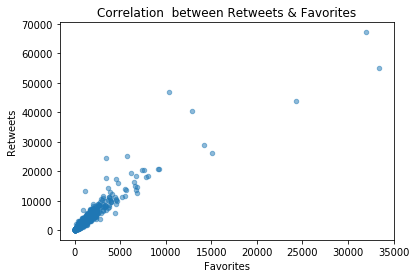

In [69]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
x = df.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', alpha = 0.5)
x.grid(False)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Correlation  between Retweets & Favorites')
plt.savefig('Retweets&FevoritesCorrelation.png')

> As we can see, the correlation betwen Retweetss and fevoites is 0.80 wich is perfect positive correlation.

* #### Second, What the average between retweets  corresponding to favorite over year?

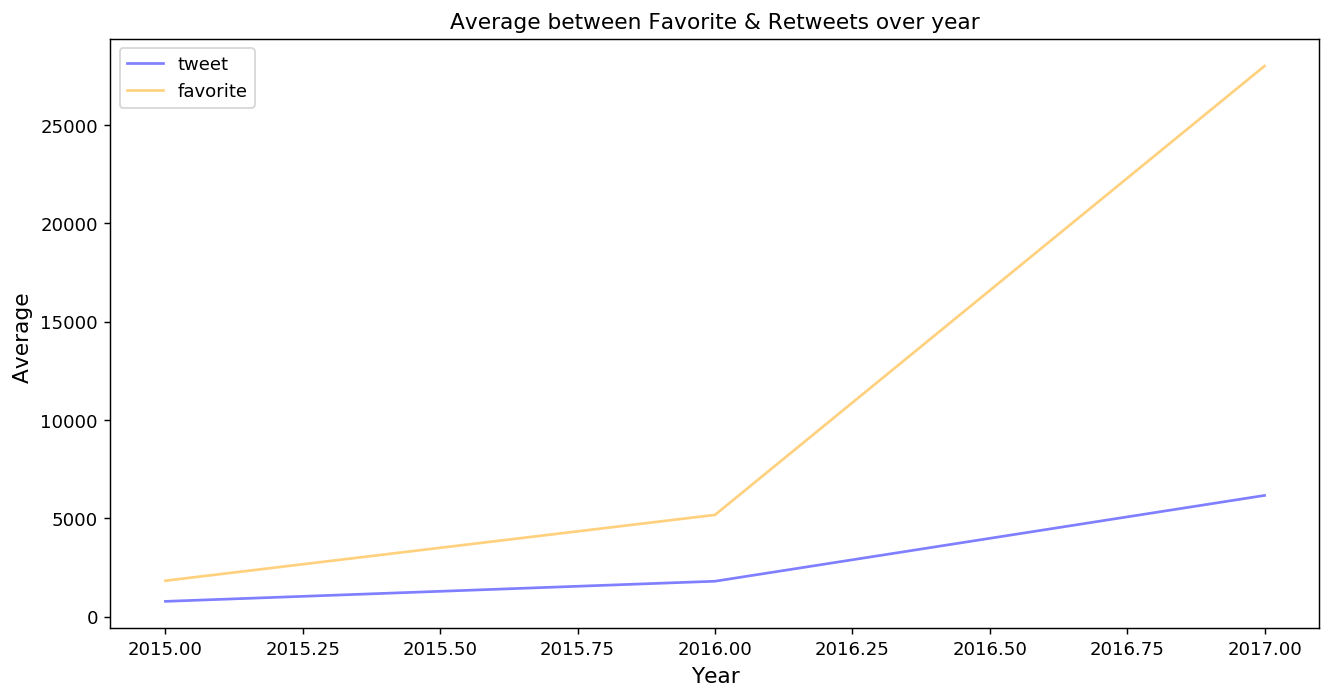

<Figure size 432x288 with 0 Axes>

In [70]:
year =  df['timestamp'].apply(lambda x: x.year)
month = df['timestamp'].apply(lambda x: x.month)

tweet_year = df.groupby(year)['retweet_count'].mean()
favorite_year = df.groupby(year)['favorite_count'].mean()


#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Year', fontsize = 12)
#on y-axis
plt.ylabel('Average ', fontsize = 12)
#title of the line plot
plt.title('Average between Favorite & Retweets over year')

#plotting the graph
plt.plot(tweet_year, color='blue',label='tweet',alpha=0.5)
plt.plot(favorite_year, color='orange',label='favorite',alpha=0.5)



#displaying the line plot
plt.legend()
plt.show()
plt.savefig('Retweets&FevoritesTrends.png')

* #### What the most tweets comes from?

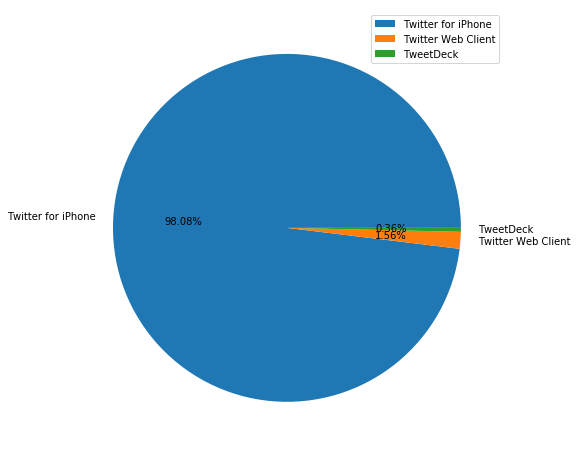

In [71]:
s = df['source'].value_counts(ascending=False)
s.plot(kind='pie',legend=False, subplots=True, autopct='%.2f%%',figsize=(12,8),label='');
plt.savefig('TweetsSource.png')
plt.legend();

In [72]:
s

Twitter for iPhone    816
Twitter Web Client     13
TweetDeck               3
Name: source, dtype: int64

* #### Average rating corresponding  to favorite?

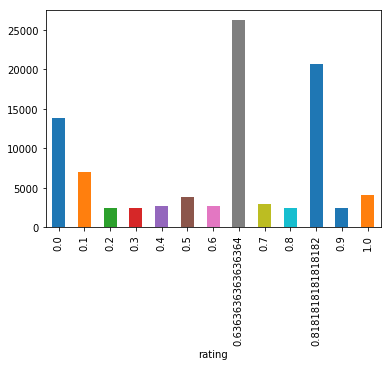

In [73]:
df.groupby('rating')['favorite_count'].mean().plot(kind ='bar');
plt.savefig('RatingVSFavBar.png')

In [74]:
df.rating.mean()

0.8611232517482488

* #### What is the Most pupular dog's names?

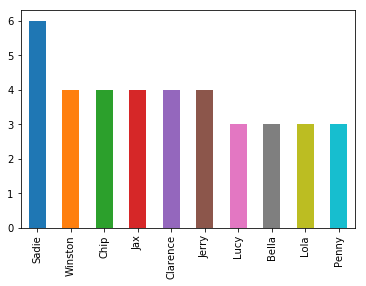

In [75]:
name_count = df['name'].value_counts(ascending=False)
name_count.head(10).plot(kind = 'bar');
plt.savefig('pupularDogDameBar.png')

In [76]:
name_count.head(10)

Sadie       6
Winston     4
Chip        4
Jax         4
Clarence    4
Jerry       4
Lucy        3
Bella       3
Lola        3
Penny       3
Name: name, dtype: int64

* #### Popular dog Stages?

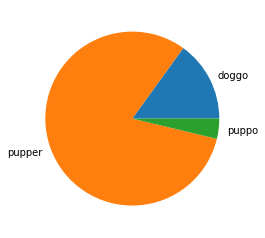

In [77]:
df.groupby('dog_stages')['retweet_count'].sum().plot(kind='pie',label = '');
plt.savefig('dogStagePie.png')

In [78]:
df.groupby('dog_stages')['retweet_count'].sum()

dog_stages
doggo      21290
pupper    114999
puppo       5300
Name: retweet_count, dtype: int64

In [79]:
df.dog_stages.value_counts()

pupper    93
doggo     11
puppo      4
Name: dog_stages, dtype: int64

* #### Heat Map of Correlation and Basic statistics

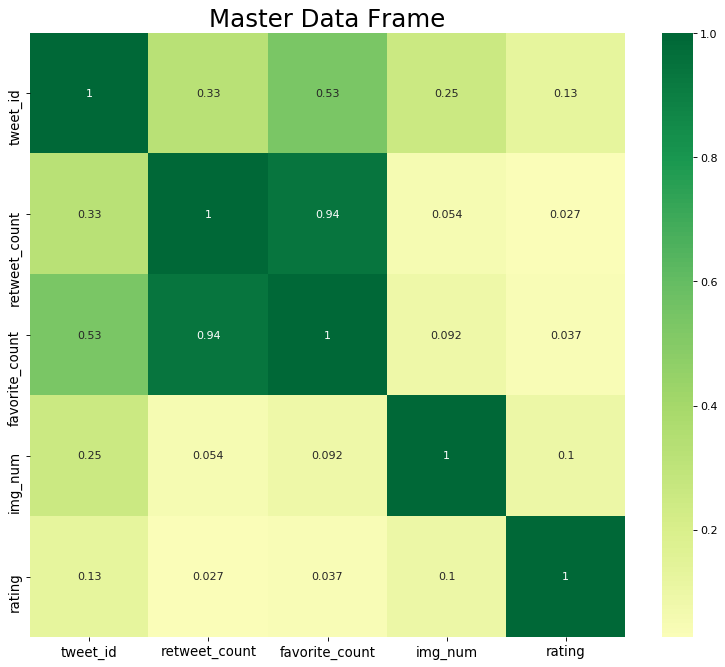

<Figure size 432x288 with 0 Axes>

In [80]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Master Data Frame', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();
plt.savefig('heatMap.png');

In [81]:
df.describe()

,tweet_id,retweet_count,favorite_count,img_num,rating
count,8.320000e+02,832.000000,832.000000,832.000000,832.000000
mean,6.945252e+17,1275.675481,3497.175481,1.093750,0.861123
std,3.368706e+16,2291.532005,5169.234624,0.361651,0.202210
min,6.660209e+17,23.000000,107.000000,1.000000,0.000000
25%,6.708101e+17,378.250000,995.500000,1.000000,0.800000
50%,6.790900e+17,760.500000,2335.000000,1.000000,1.000000
75%,7.073959e+17,1379.750000,4004.000000,1.000000,1.000000
max,8.834828e+17,33421.000000,67100.000000,4.000000,1.000000
